**Import used libraries**

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the original dataset file**

In [2]:
uploaded = files.upload()

Saving heart1.csv to heart1.csv


In [3]:
df1 = pd.read_csv('heart1.csv')
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Check for any missing values in the dataset**

In [4]:
df1.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**No missing values found**

In [5]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Check if the dataset is balanced**

In [6]:
class_counts = df1['target'].value_counts()

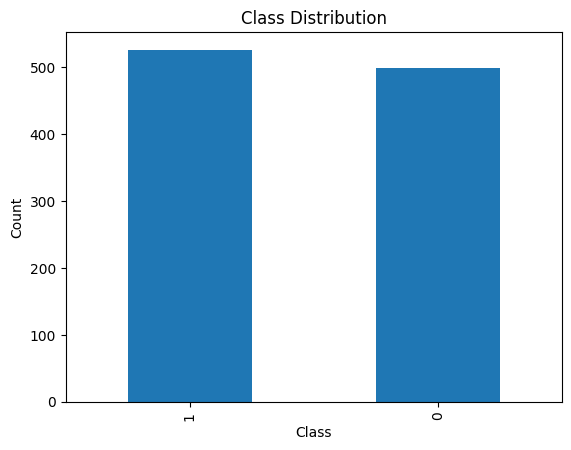

In [7]:
class_counts.plot(kind ='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 0.95


In [9]:
x = df1.drop(columns = ['target']).values
print(x)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]


In [10]:
y = df1['target'].values
print(y)

[0 0 0 ... 0 1 0]


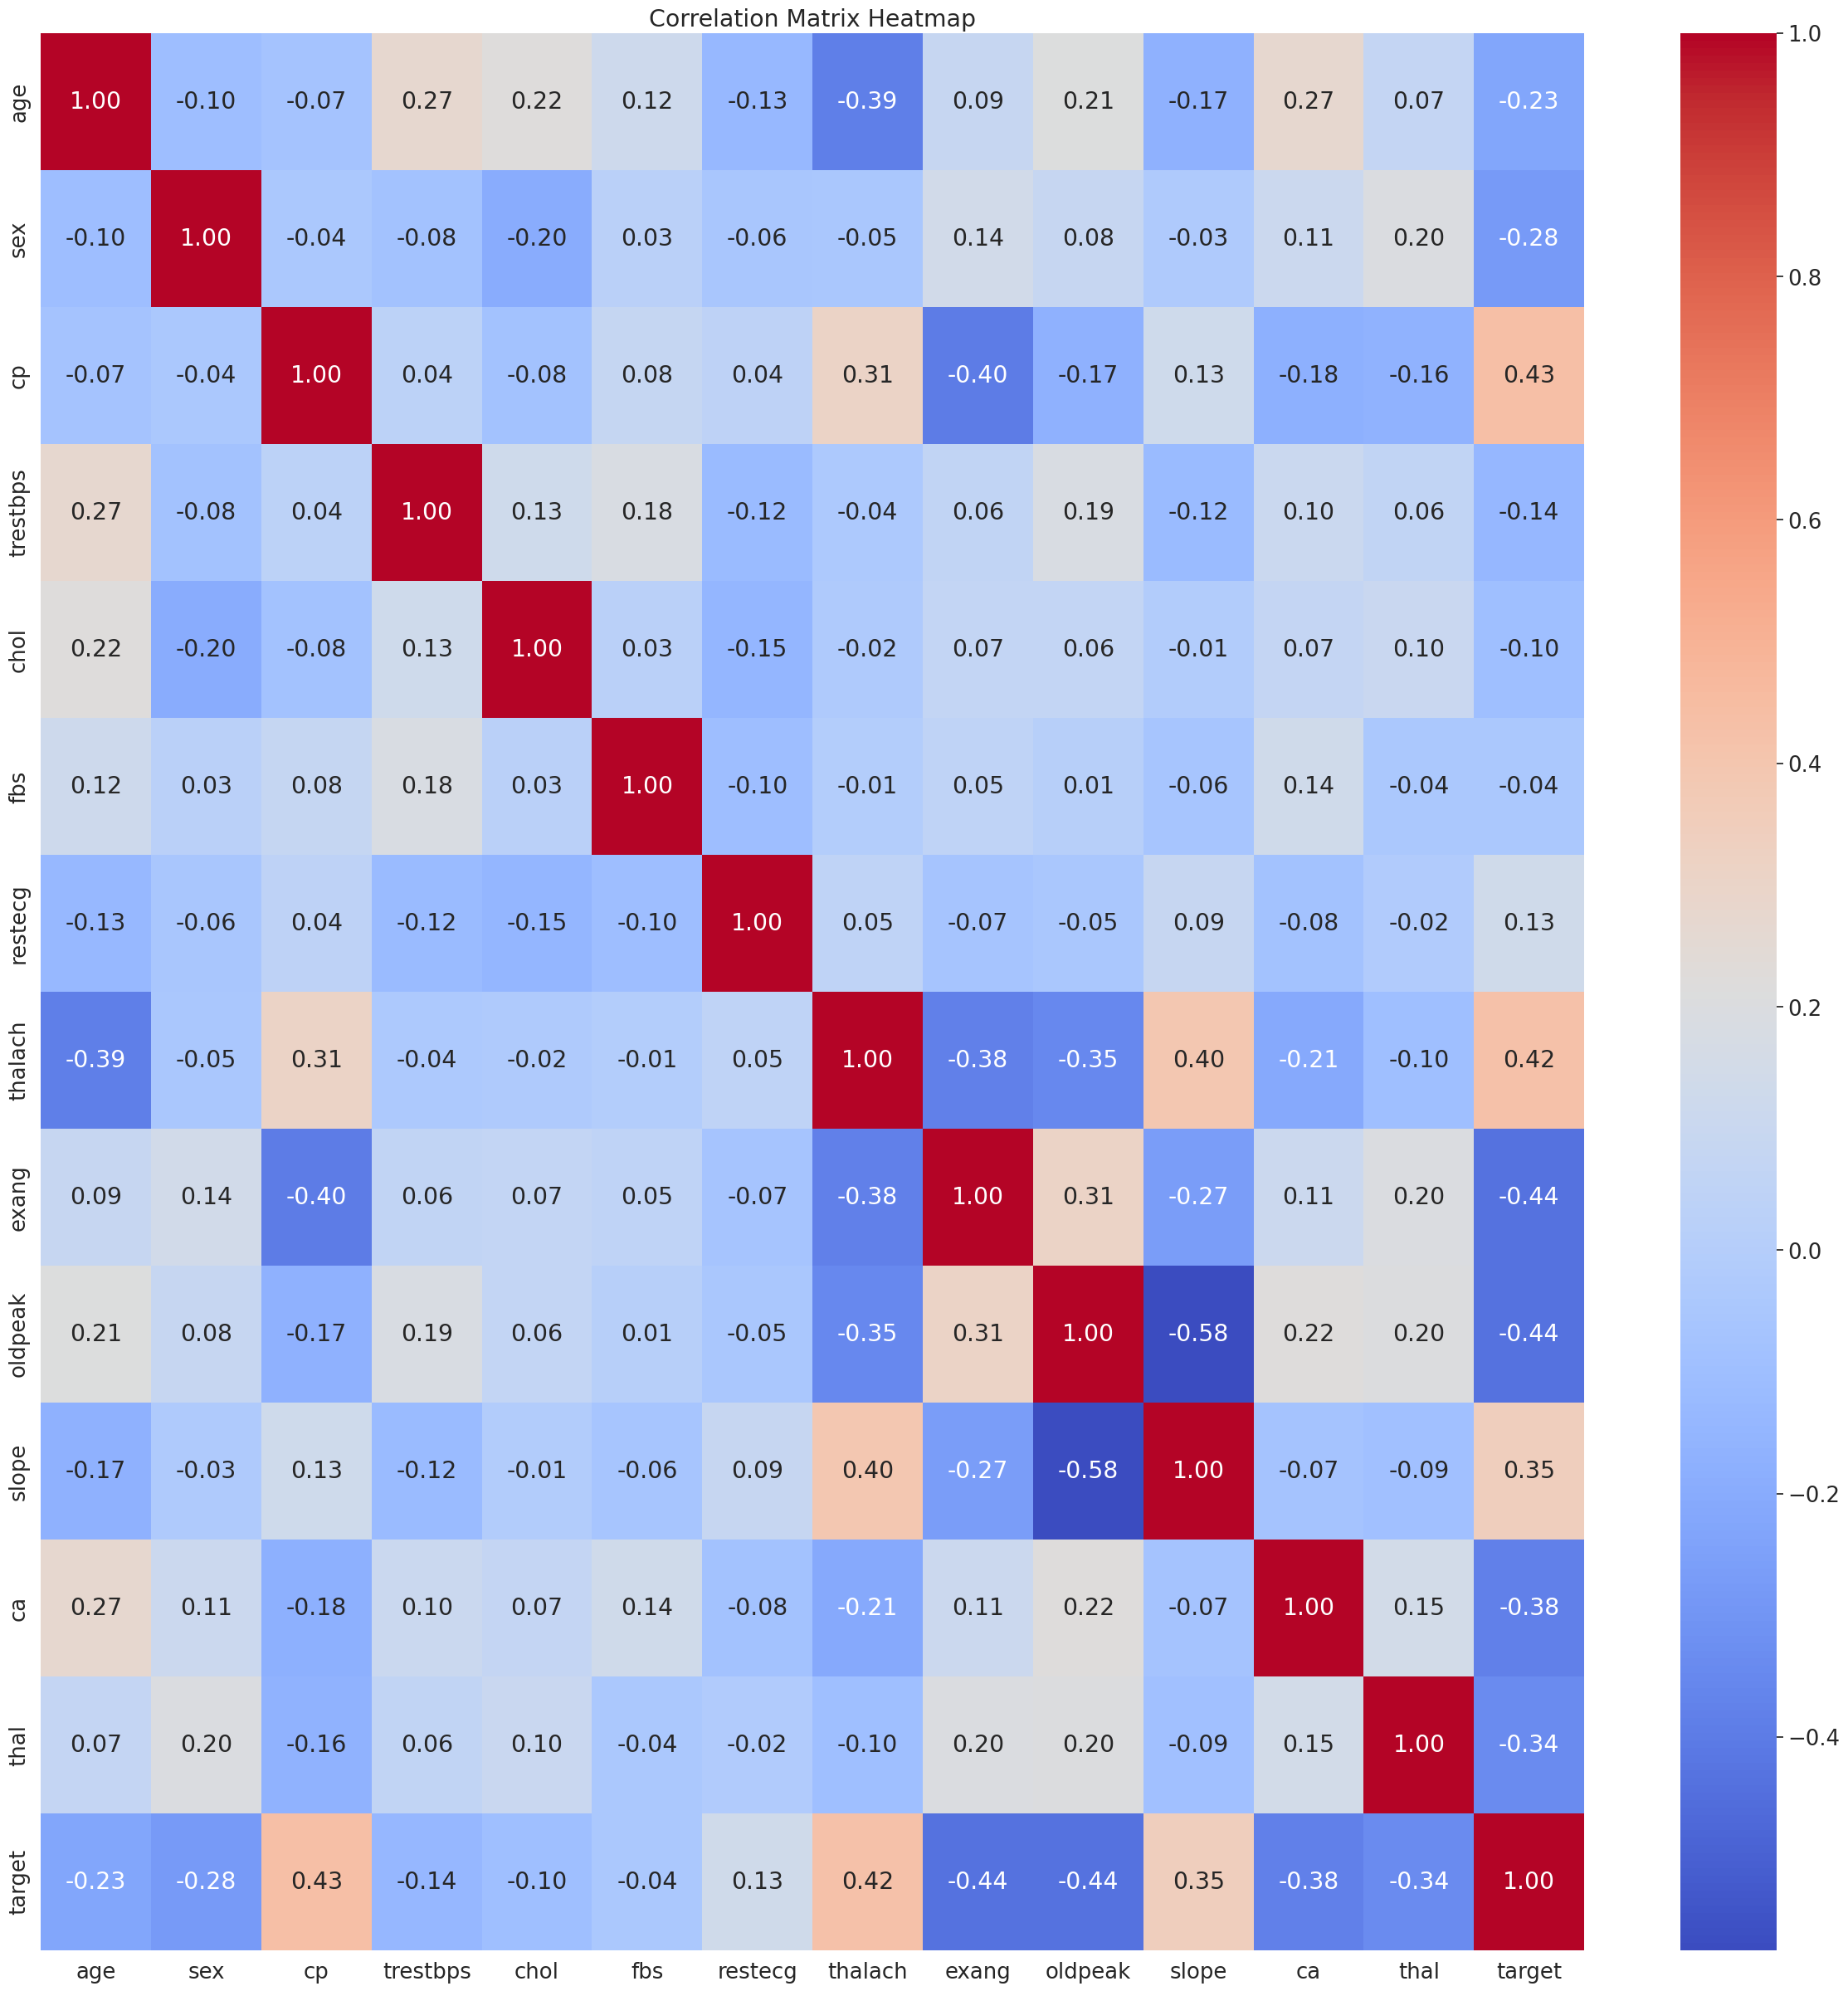

In [25]:
# Calculate the correlation matrix
sns.set(font_scale = 1.7)
correlation_matrix = df1.corr()

# Plot the correlation matrix
plt.figure(figsize = (30,30))
sns.heatmap(correlation_matrix, annot = True, fmt ='.2f',cmap = "coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Check for outliers**

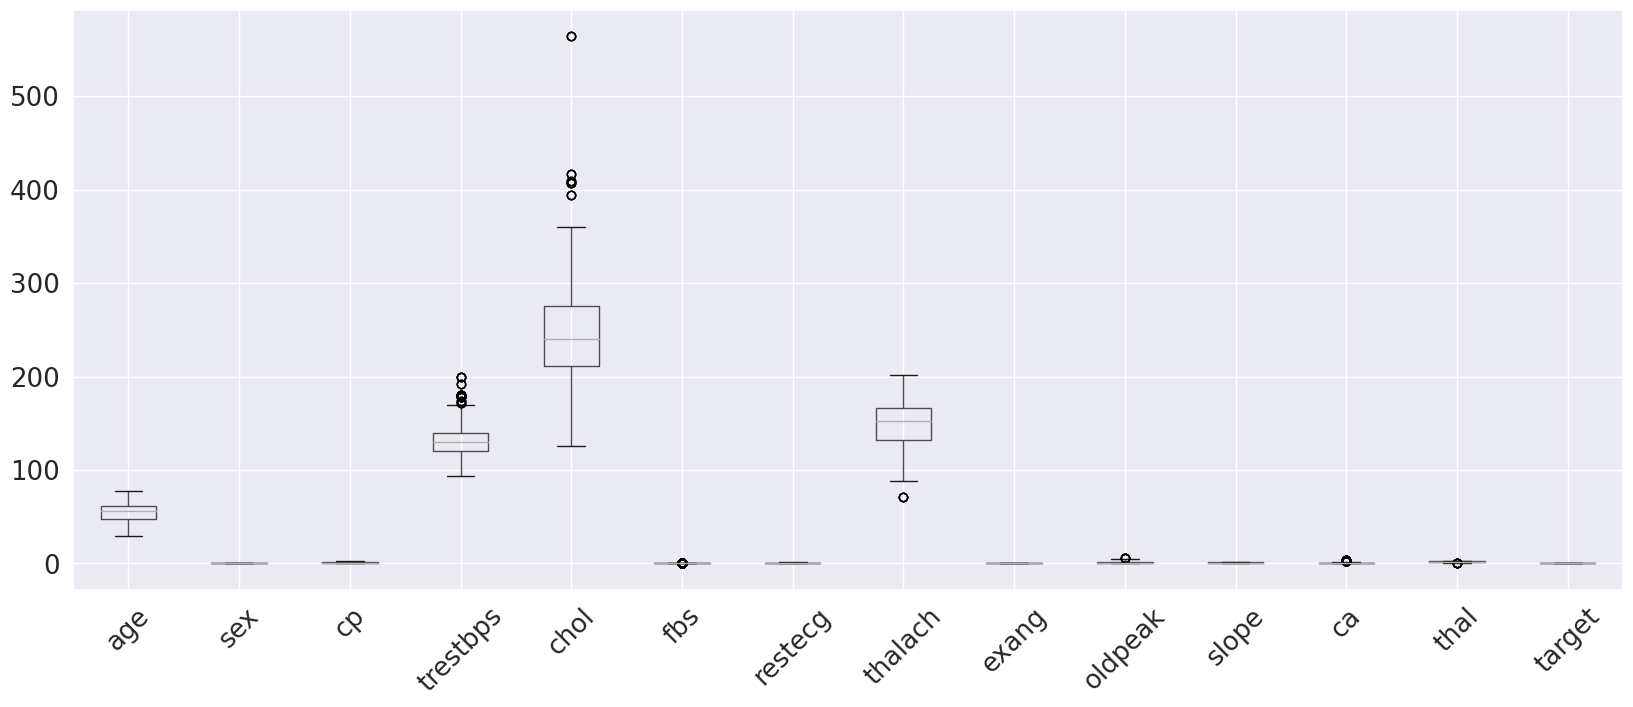

In [12]:
boxplot = df1.boxplot(figsize = (20,10))
plt.xticks(rotation = 45)
plt.subplots_adjust(bottom = 0.3)
plt.show()

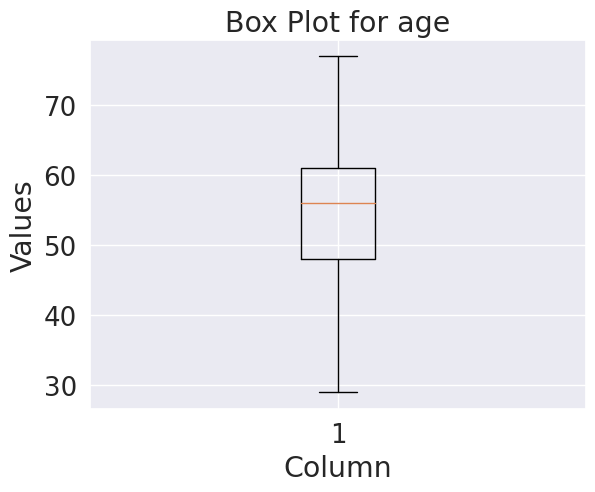

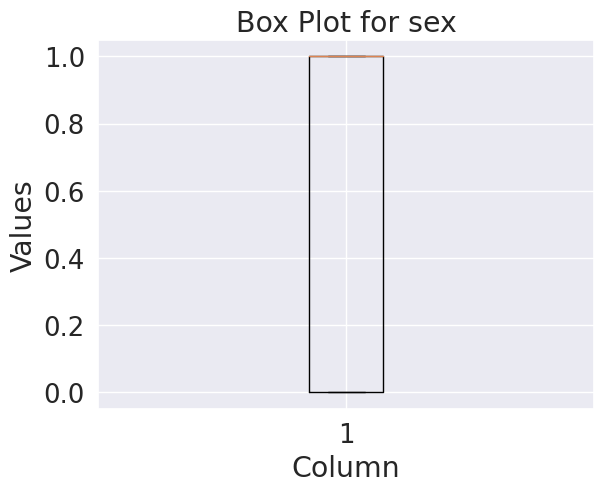

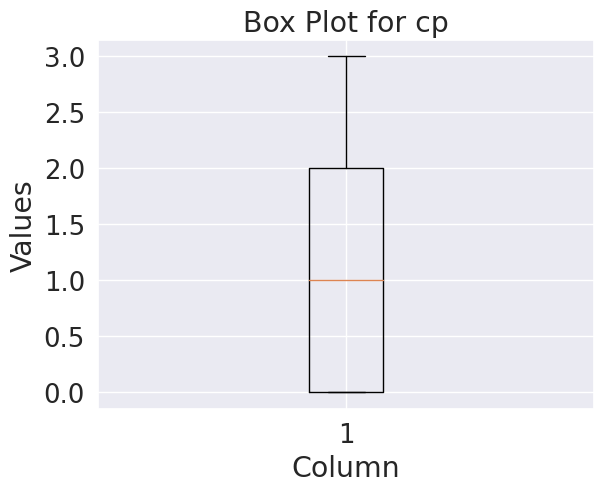

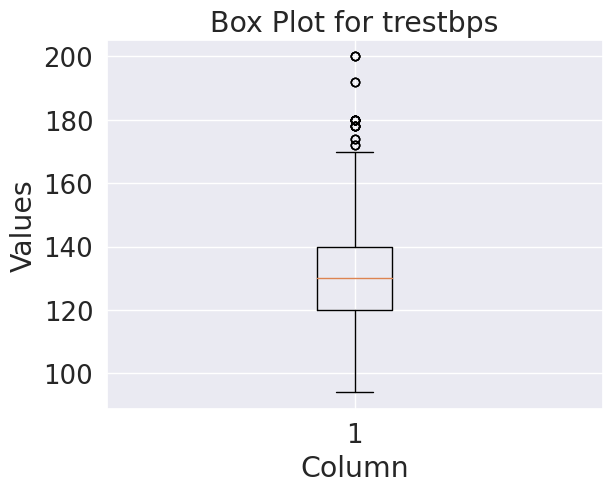

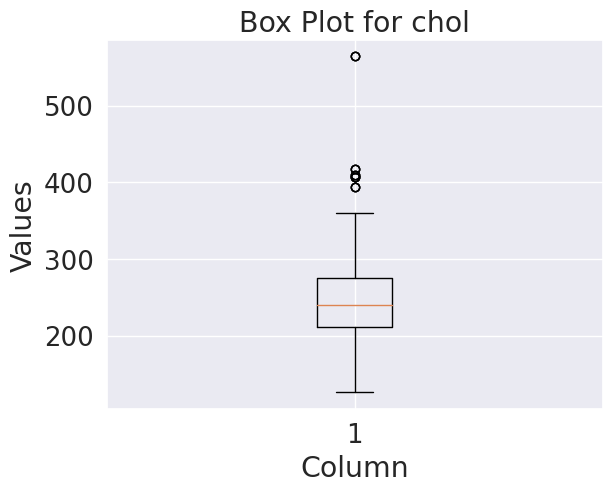

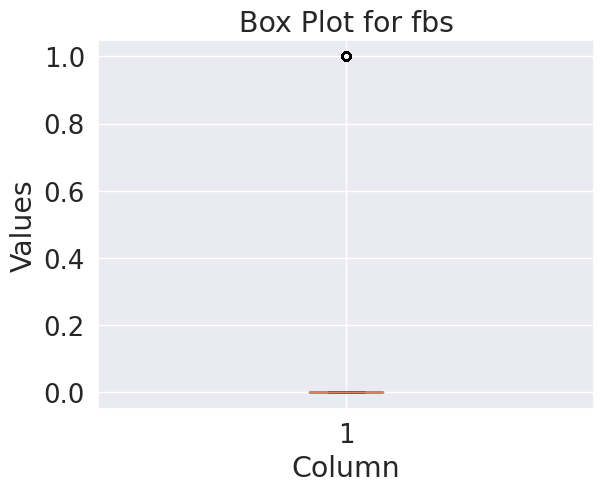

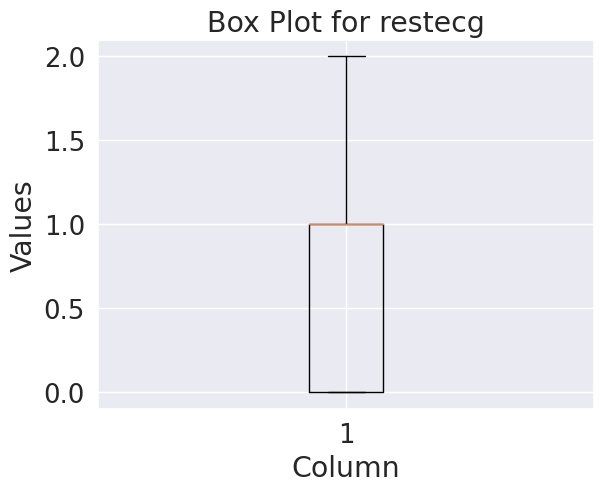

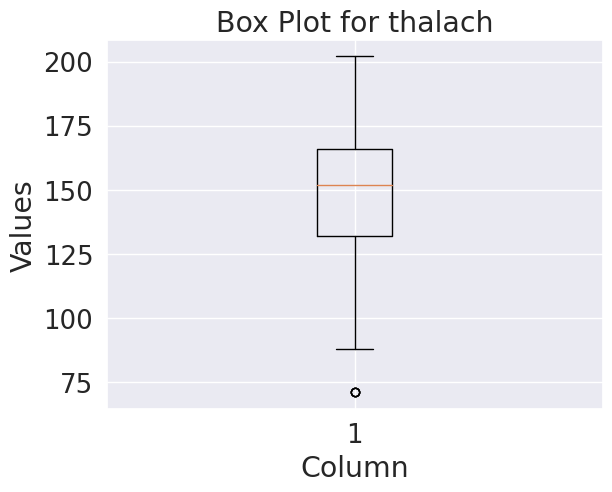

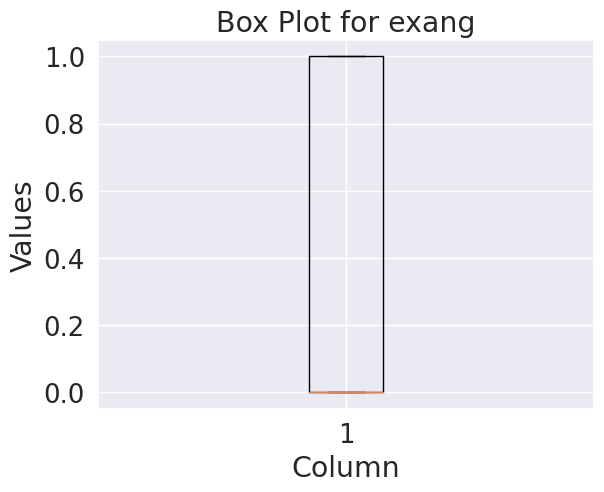

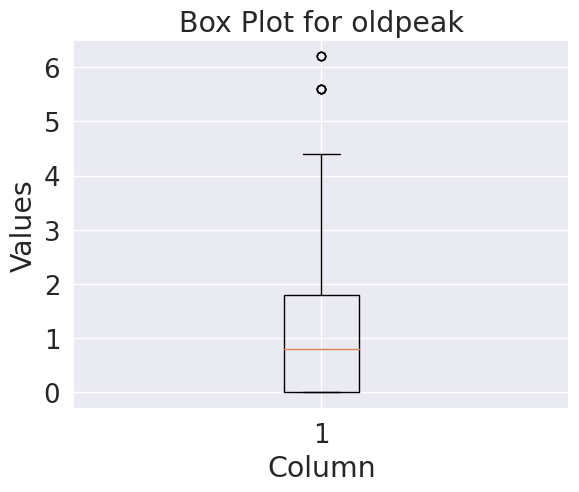

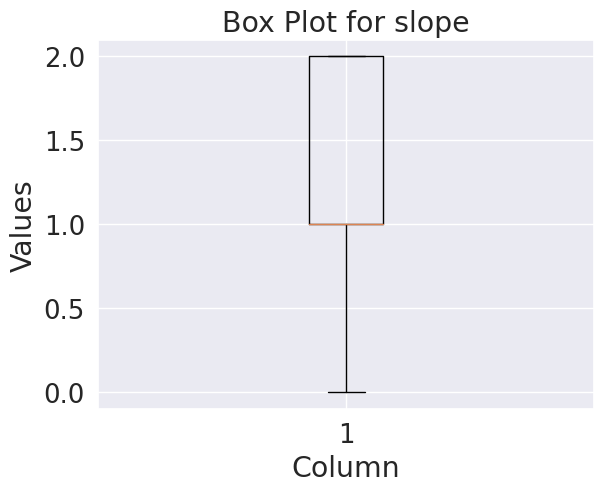

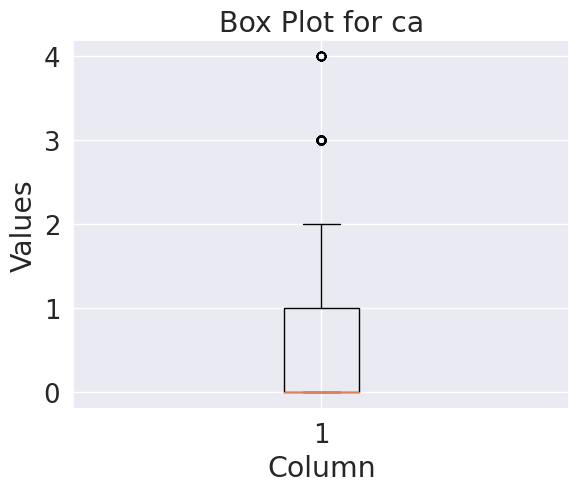

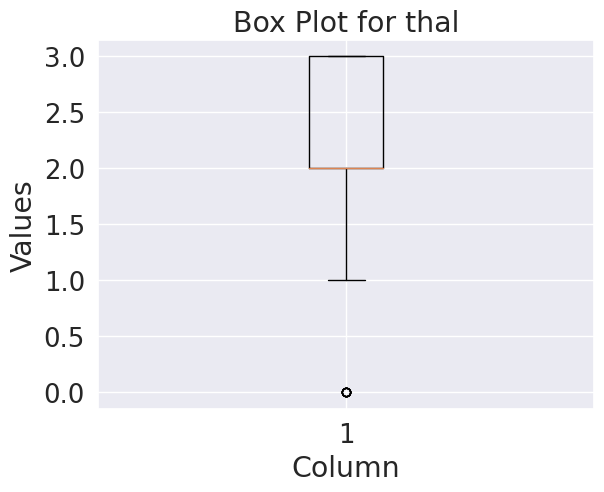

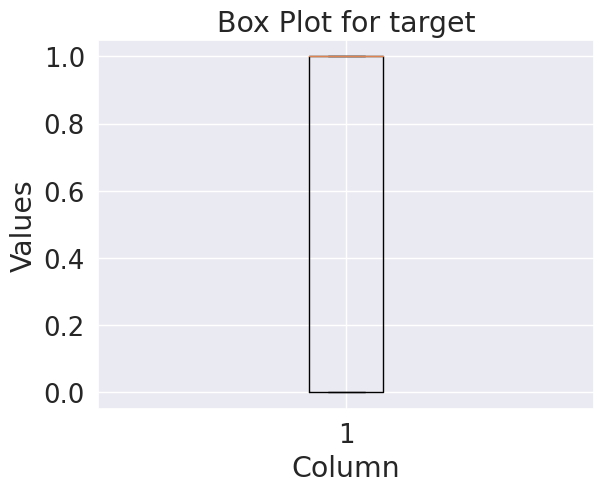

In [13]:
features = df1.columns
# Iterate over each feature and create a box plot
for feature in features:
    plt.boxplot(df1[feature])
    plt.title('Box Plot for {}'.format(feature))
    plt.xlabel('Column')
    plt.ylabel('Values')
    plt.show()

**Data Normalization**

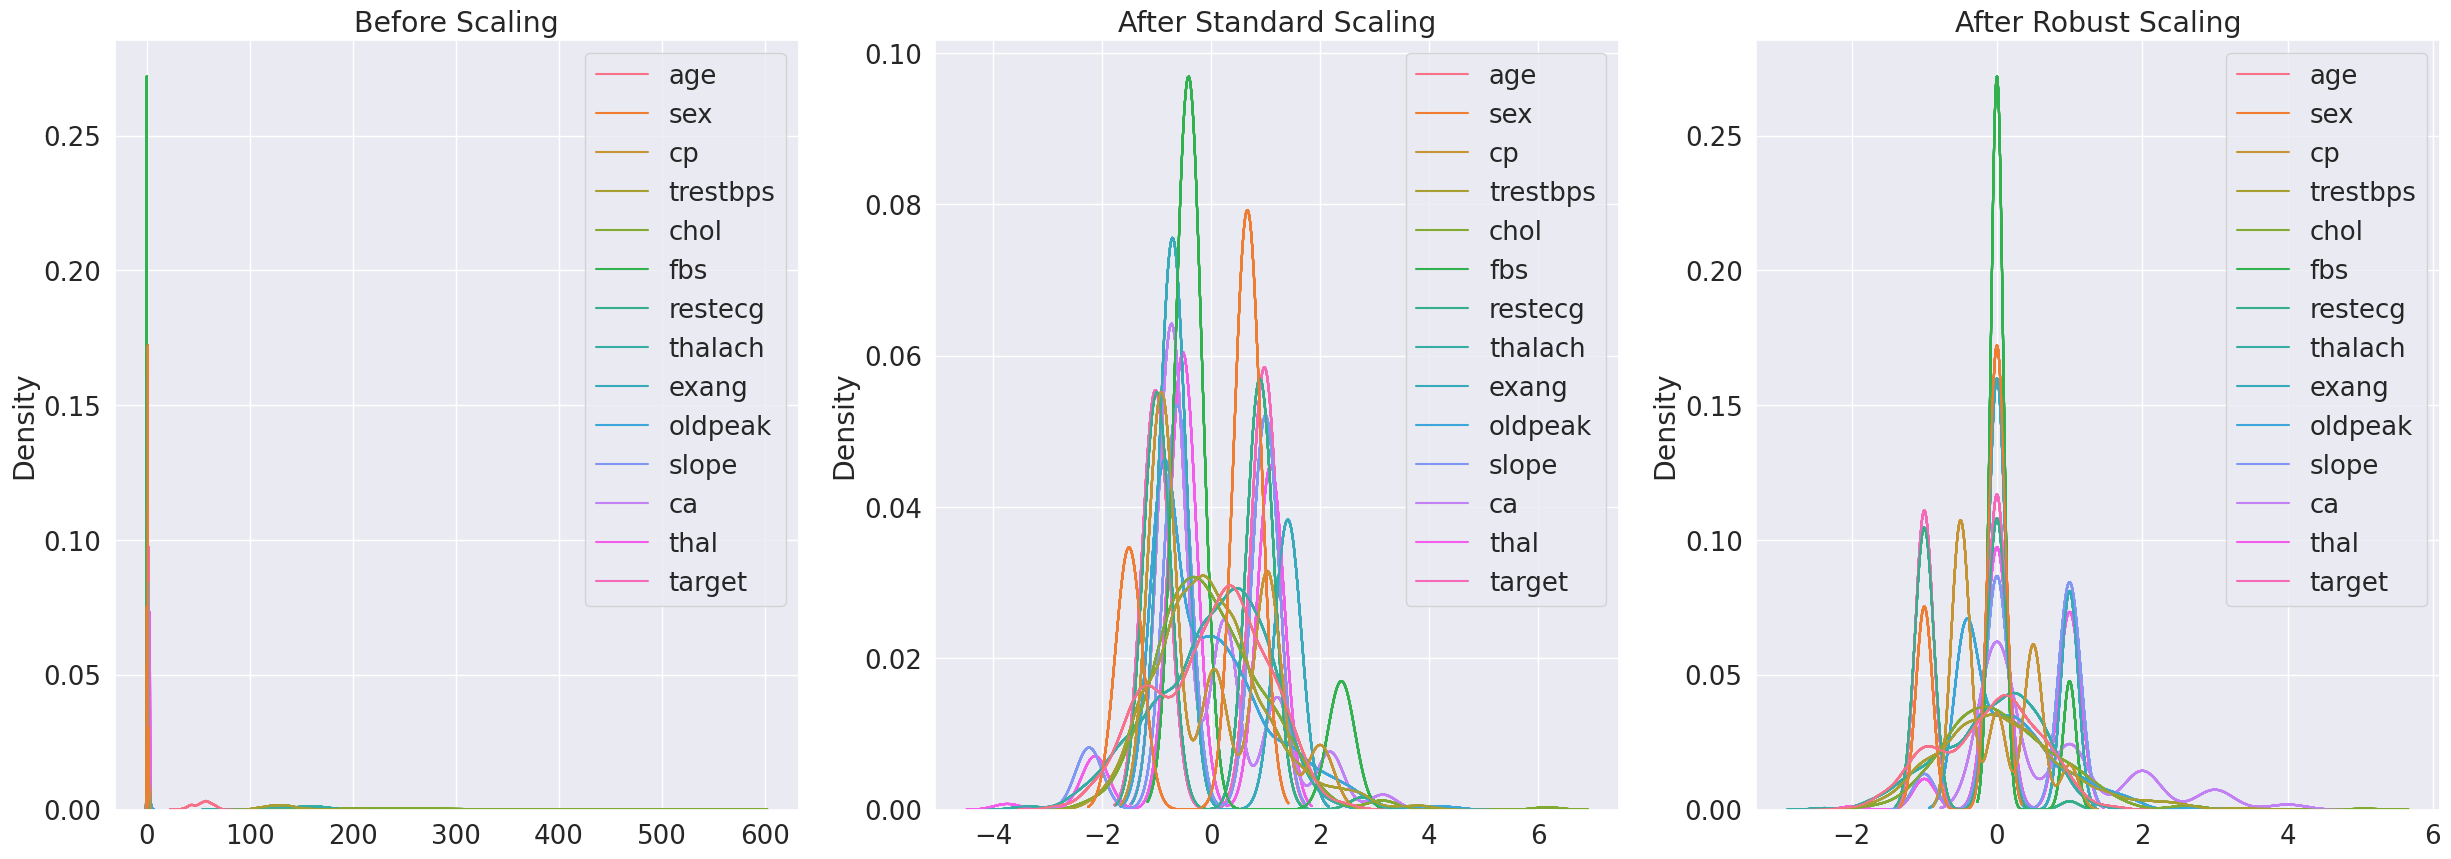

In [14]:
# Generate sample data
data = df1

# Define a function to normalize the data using any scaler
def normalize_data(data, scaler):
    scaled_data = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_data, columns = data.columns)
    return scaled_df

# Normalize the data using different scalers
standard_df = normalize_data(data, preprocessing.StandardScaler())
robust_df = normalize_data(data, preprocessing.RobustScaler())

# Plot the original and normalized data
fig, axes = plt.subplots(ncols = 3, figsize = (30,10))

# Original Data
axes[0].set_title('Before Scaling')
for column in data.columns:
    sns.kdeplot(data, ax = axes[0])

# After Standard Scaling
axes[1].set_title('After Standard Scaling')
for column in standard_df.columns:
    sns.kdeplot(standard_df, ax = axes[1])

# After Robust Scaling
axes[2].set_title('After Robust Scaling')
for column in robust_df.columns:
    sns.kdeplot(robust_df, ax = axes[2])

plt.show()

In [15]:
# Save the pre-processed dataset to the specified path
df1.to_csv('processed_file.csv', index = False)

In [16]:
X = df1.drop(columns = ['target'])
y = df1['target']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.to_csv('train_data.csv', index = False)
X_test.to_csv('test_data.csv', index = False)

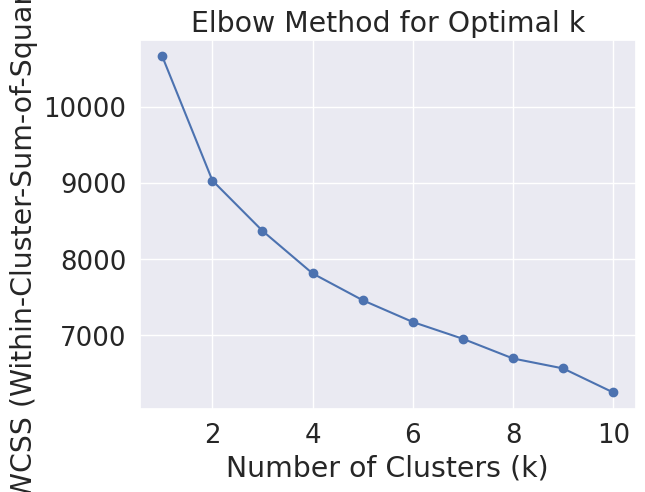

In [17]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker ='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

In [18]:
# Choose the optimal k based on the elbow method (e.g., k=3)
optimal_k = 3

# Train the k-means model with the chosen k
kmeans = KMeans(n_clusters=optimal_k, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X_train_scaled)

# Add the cluster labels to the original dataset
X_train['Cluster_Label'] = kmeans.labels_

# Additional: Print the count of data points in each cluster
print(X_train['Cluster_Label'].value_counts())

1    424
2    278
0    118
Name: Cluster_Label, dtype: int64


*   Apply elbow method followed by k-means algorithm on train data
*   Apply confusion matrix, classification report and accuracy score to test data


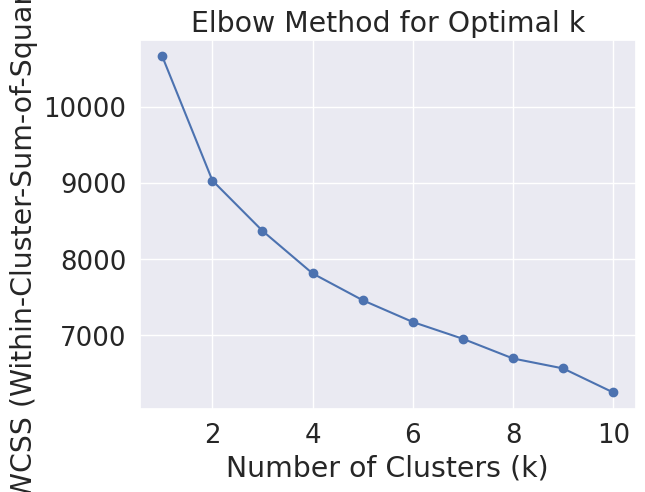


Count of Data Points in Each Cluster (Training Data):
Cluster 1: 424
Cluster 2: 278
Cluster 0: 118

Confusion Matrix (Test Data):
 [[17 31 54]
 [15 75 13]
 [ 0  0  0]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.53      0.17      0.25       102
           1       0.71      0.73      0.72       103
           2       0.00      0.00      0.00         0

    accuracy                           0.45       205
   macro avg       0.41      0.30      0.32       205
weighted avg       0.62      0.45      0.49       205


Accuracy (Test Data): 44.88 %


Count of Data Points in Each Cluster (Test Data):
Cluster 1: 106
Cluster 2: 67
Cluster 0: 32


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
df = pd.read_csv('processed_file.csv')

# Assuming 'X' contains features and 'y' contains the target variable 'target'
X = df.drop(columns = ['target'])
y = df['target']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker ='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

# Choose the optimal k based on the elbow method
optimal_k = 3

# Train your KMeans model with the chosen k
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

kmeans = KMeans(n_clusters=optimal_k, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X_train_scaled)

# Apply K-means on the training set
y_train_pred = kmeans.predict(X_train_scaled)

# Additional: Print the count of data points in each cluster for the training data
print("\nCount of Data Points in Each Cluster (Training Data):")
cluster_counts = pd.Series(y_train_pred).value_counts()

# Print the cluster counts with better alignment
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count}")

# Scale the features using the same scaler for the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_test_pred = kmeans.predict(X_test_scaled)

# Evaluate the model on the test set
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
class_report = sklearn.metrics.classification_report(y_test, y_test_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics with added space
print("\nConfusion Matrix (Test Data):\n", conf_matrix)
print("\nClassification Report (Test Data):\n", class_report)
print("\nAccuracy (Test Data):", round(accuracy * 100, 2), "%\n")

# Additional: Print the count of data points in each cluster for the test data
print("\nCount of Data Points in Each Cluster (Test Data):")
cluster_counts = pd.Series(y_test_pred).value_counts()

# Print the cluster counts with better alignment
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count}")

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

svm_model = SVC(kernel='linear', C = 1.0)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

*   Apply svm algorithm on train data
*   Apply confusion matrix, classification report and accuracy score to test data


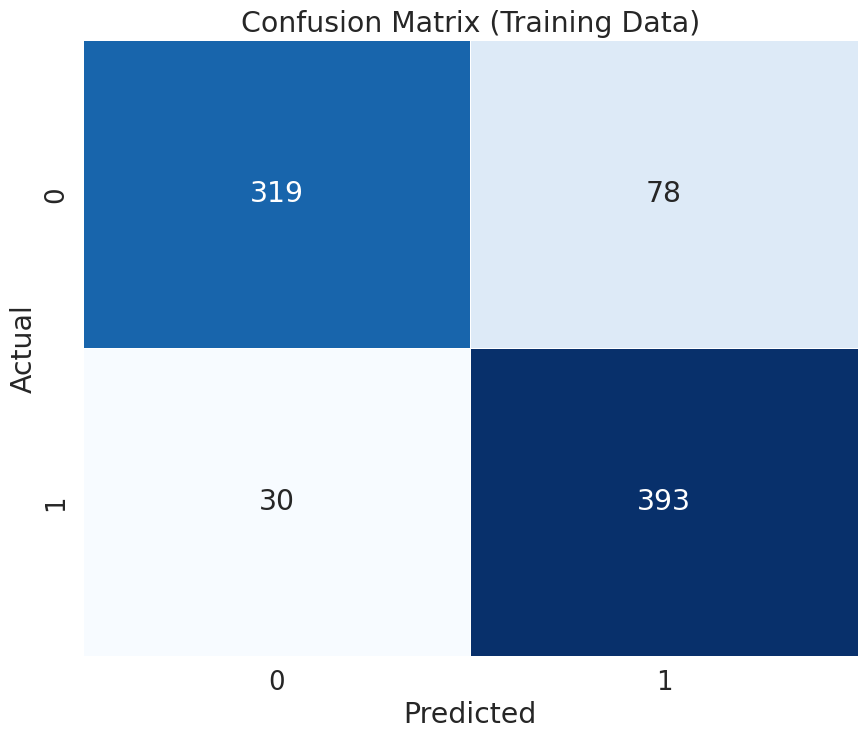

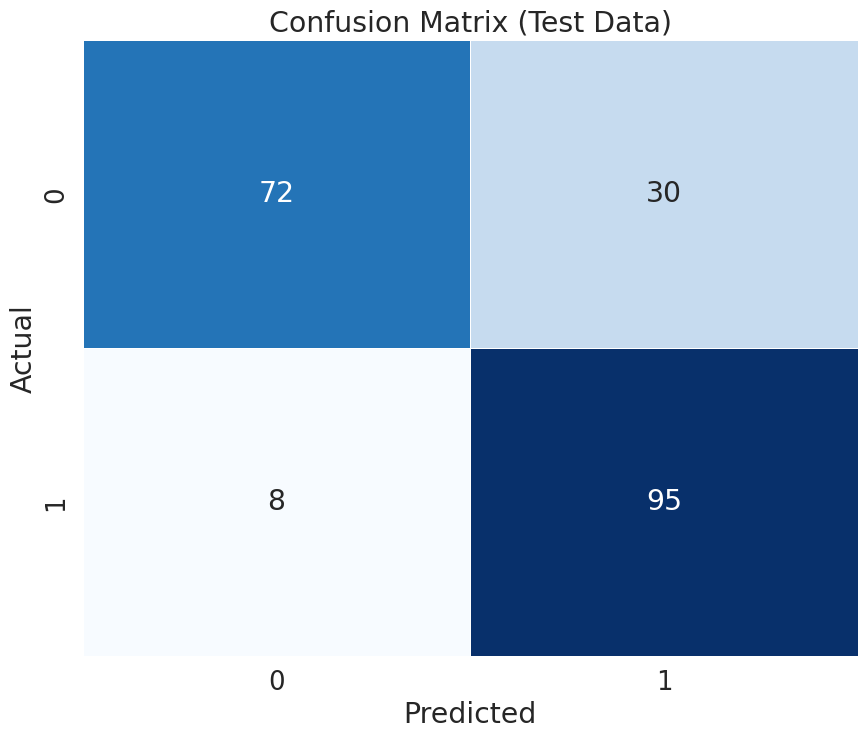


Confusion Matrix (Test Data):
 [[72 30]
 [ 8 95]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205


Accuracy (Test Data): 81.46 %


In [21]:
df = pd.read_csv('processed_file.csv')

# Assuming 'X' contains features and 'y' contains the target variable 'target'
X = df.drop(columns = ['target'])
y = df['target']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', C = 1.0)
svm_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred = svm_model.predict(X_train_scaled)

# Evaluate on the training set
conf_matrix_train = sklearn.metrics.confusion_matrix(y_train, y_train_pred)

# Plotting the confusion matrix with smaller figure size and cell size for training set
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train, annot = True, fmt ='d', cmap ='Blues', cbar = False, linewidths =.5)
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate on the test set
y_test_pred = svm_model.predict(X_test_scaled)

# Confusion Matrix for the test set
conf_matrix_test = sklearn.metrics.confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix with smaller figure size and cell size for test set
plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix_test, annot = True, fmt ='d', cmap ='Blues', cbar = False, linewidths =.5)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report and Accuracy for the test set
class_report = sklearn.metrics.classification_report(y_test, y_test_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics with added space
print("\nConfusion Matrix (Test Data):\n", conf_matrix_test)
print("\nClassification Report (Test Data):\n", class_report)
print("\nAccuracy (Test Data):", round(accuracy * 100, 2), "%")

*   Apply elbow method followed by knn algorithm on train data
*   Apply confusion matrix, classification report and accuracy score to test data


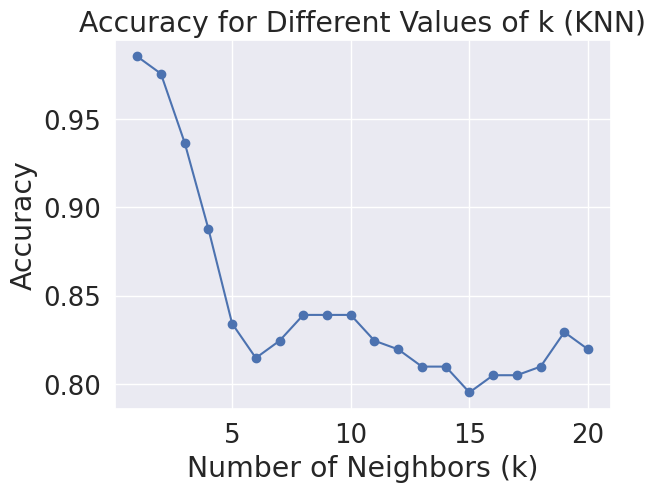

Optimal value of k: 1

Confusion Matrix (Test Data):
 [[102   0]
 [  3 100]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Accuracy (Test Data): 98.54 %



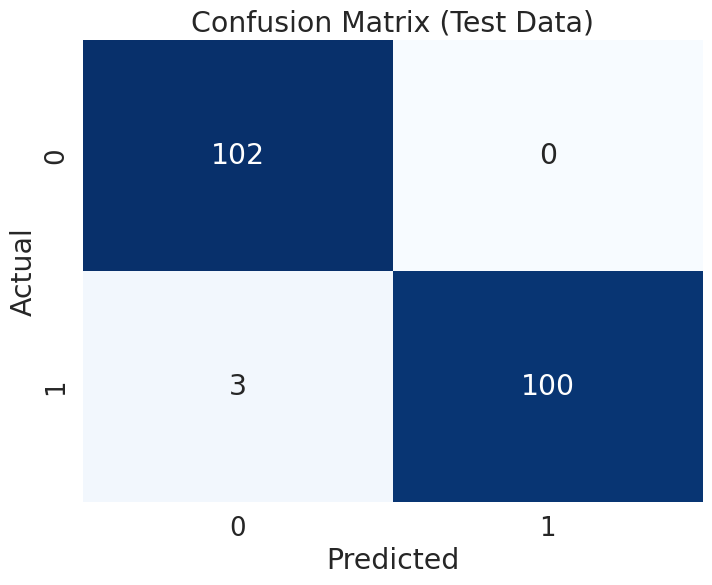

In [22]:
df = pd.read_csv('processed_file.csv')

# Assuming 'X' contains features and 'y' contains the target variable 'target'
X = df.drop(columns = ['target'])
y = df['target']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Find the optimal value of k using the elbow method
k_values = list(range(1, 21))  # You can adjust the range of k values
accuracy_values = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(scaler.transform(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the accuracy for different k values
plt.plot(k_values, accuracy_values, marker ='o')
plt.title('Accuracy for Different Values of k (KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

# Find the optimal value of k based on the plot (e.g., where accuracy plateaus)
optimal_k = k_values[np.argmax(accuracy_values)]
print(f'Optimal value of k: {optimal_k}')

# Train the KNN model with the chosen optimal k
knn_model = KNeighborsClassifier(n_neighbors = optimal_k)
knn_model.fit(X_train_scaled, y_train)

# Scale the features using the same scaler for the test data
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_test_pred = knn_model.predict(X_test_scaled)

# Evaluate the model on the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics with added space
print("\nConfusion Matrix (Test Data):\n", conf_matrix)
print("\nClassification Report (Test Data):\n", class_report)
print("\nAccuracy (Test Data):", round(accuracy * 100, 2), "%\n")

# Plot the confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt ='d', cmap ='Blues', cbar = False)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()